<a href="https://colab.research.google.com/github/Poojitha-321/Restuarants-and-Cuisines-Data/blob/main/Cognifyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as npp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Level 1 Task 1

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
df['Cuisines'] = df['Cuisines'].fillna('Not specified')
df['City'] = df['City'].fillna('Unknown')
df['Aggregate rating'] = df['Aggregate rating'].fillna(df['Aggregate rating'].mean())
df.dropna(subset=['Restaurant Name', 'Address'], inplace=True)
numeric_cols = ['Votes', 'Average Cost for two', 'Price range', 'Aggregate rating']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
display(df.describe())

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


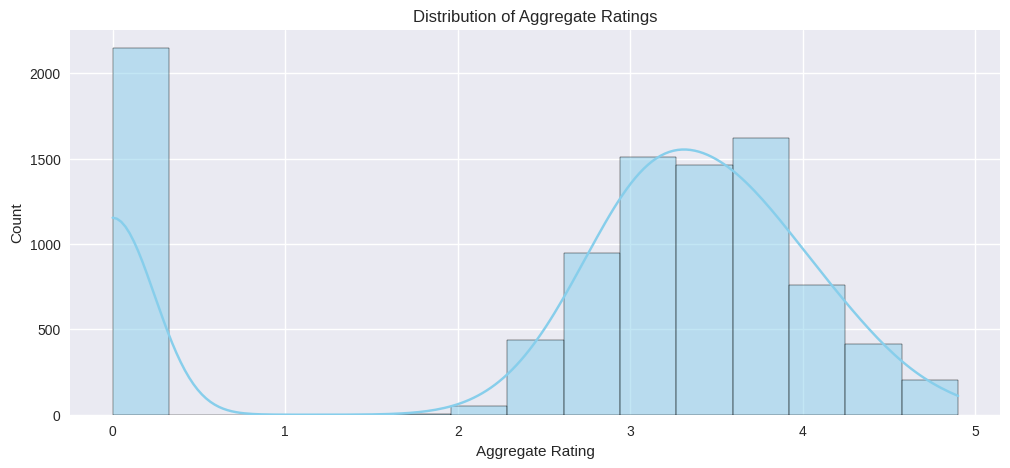

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Aggregate rating'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

Ratings Value Counts:
Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


/tmp/ipython-input-2142584197.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")


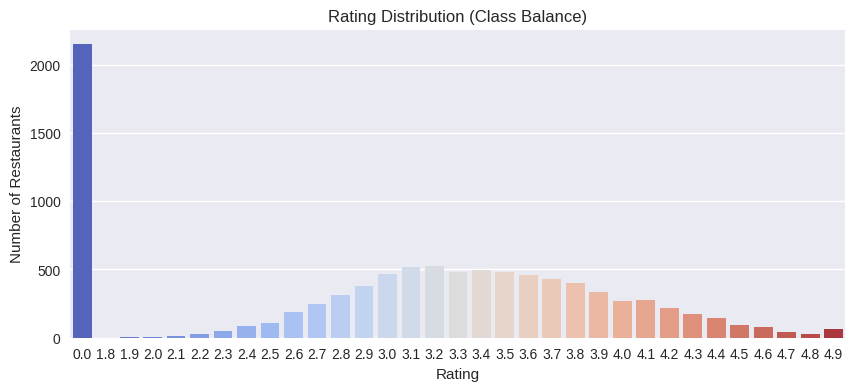

In [ ]:
rating_counts = df['Aggregate rating'].value_counts().sort_index()
print("Ratings Value Counts:")
print(rating_counts)

plt.figure(figsize=(10, 4))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")
plt.title('Rating Distribution (Class Balance)')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

In [ ]:
print("Insights:")
print(f"- Total Restaurants: {len(df)}")
print(f"- Missing values handled successfully.")
print(f"- Ratings range from {df['Aggregate rating'].min()} to {df['Aggregate rating'].max()}.")
print(f"- Average Rating: {df['Aggregate rating'].mean():.2f}")

Insights:
- Total Restaurants: 9551
- Missing values handled successfully.
- Ratings range from 0.0 to 4.9.
- Average Rating: 2.67


Level 1 Task 2

In [ ]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{col}:")
    print(f"  Mean = {df[col].mean():.2f}")
    print(f"  Median = {df[col].median():.2f}")
    print(f"  Std Dev = {df[col].std():.2f}\n")

Restaurant ID:
  Mean = 9051128.35
  Median = 6004089.00
  Std Dev = 8791521.28

Country Code:
  Mean = 18.37
  Median = 1.00
  Std Dev = 56.75

Longitude:
  Mean = 64.13
  Median = 77.19
  Std Dev = 41.47

Latitude:
  Mean = 25.85
  Median = 28.57
  Std Dev = 11.01

Average Cost for two:
  Mean = 1199.21
  Median = 400.00
  Std Dev = 16121.18

Price range:
  Mean = 1.80
  Median = 2.00
  Std Dev = 0.91

Aggregate rating:
  Mean = 2.67
  Median = 3.20
  Std Dev = 1.52

Votes:
  Mean = 156.91
  Median = 31.00
  Std Dev = 430.17



In [ ]:
categorical_cols = ['Country Code', 'City', 'Cuisines']

print("\n🏙️ DISTRIBUTION OF CATEGORICAL VARIABLES:")
for col in categorical_cols:
    print(f"\n{col} — Unique values: {df[col].nunique()}")
    print(df[col].value_counts().head(10))


🏙️ DISTRIBUTION OF CATEGORICAL VARIABLES:

Country Code — Unique values: 15
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

City — Unique values: 141
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64

Cuisines — Unique values: 1826
Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


 TOP 10 CUISINES WITH HIGHEST NUMBER OF RESTAURANTS:
Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


/tmp/ipython-input-1417681536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')


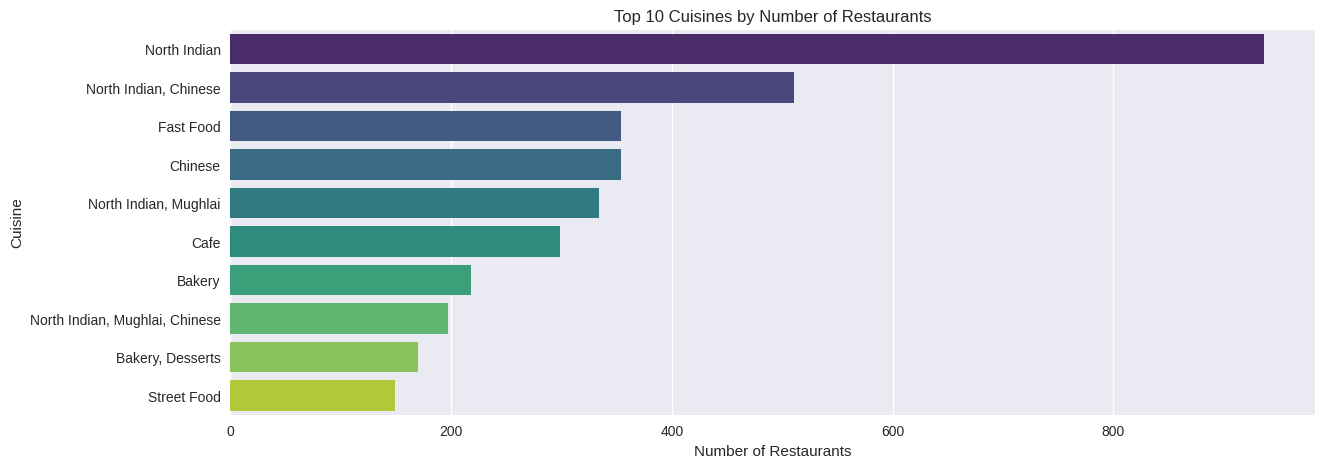

In [ ]:
top_cuisines = df['Cuisines'].value_counts().head(10)

print(" TOP 10 CUISINES WITH HIGHEST NUMBER OF RESTAURANTS:")
print(top_cuisines)
plt.figure(figsize=(14, 5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Cuisines by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


TOP 10 CITIES WITH HIGHEST NUMBER OF RESTAURANTS:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


/tmp/ipython-input-3494550784.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='plasma')


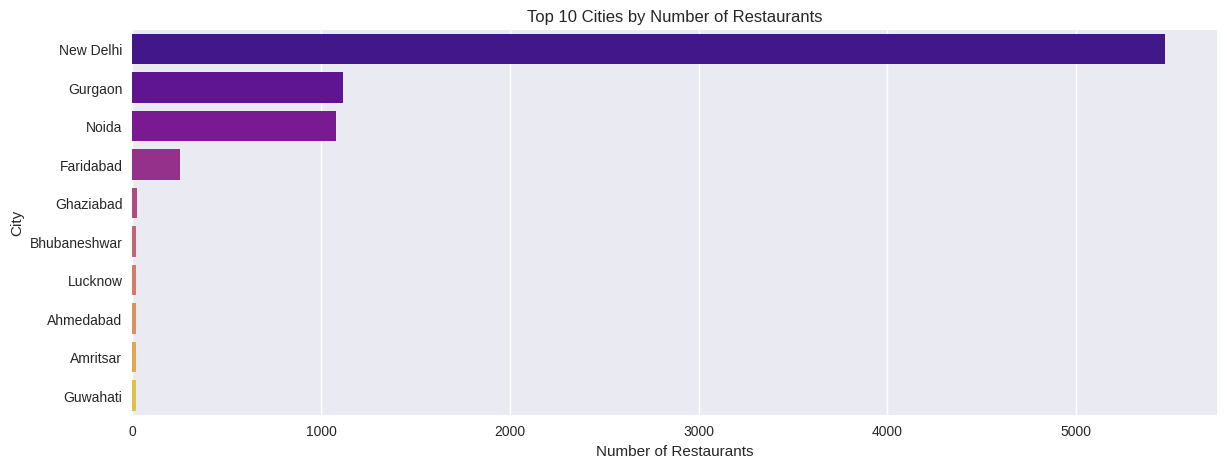

In [ ]:
top_cities = df['City'].value_counts().head(10)
print("\nTOP 10 CITIES WITH HIGHEST NUMBER OF RESTAURANTS:")
print(top_cities)
plt.figure(figsize=(14, 5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='plasma')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

Level 1 Task 3

In [ ]:
print(" Location Columns Check:")
print(df[['Latitude', 'Longitude']].head())

 Location Columns Check:
    Latitude   Longitude
0  14.565443  121.027535
1  14.553708  121.014101
2  14.581404  121.056831
3  14.585318  121.056475
4  14.584450  121.057508


In [ ]:
import folium

df = df.dropna(subset=['Latitude', 'Longitude'])
sample_df = df.sample(min(500, len(df)))

map_center = [sample_df['Latitude'].mean(), sample_df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=4)

In [ ]:
for _, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)


In [ ]:
m


🏙️ RESTAURANT COUNT BY CITY:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


/tmp/ipython-input-101488983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


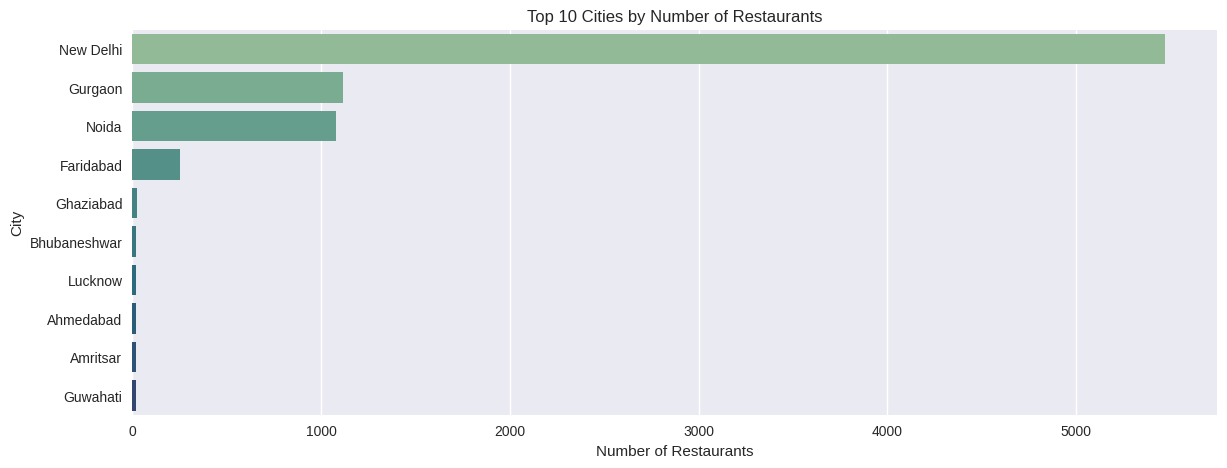


🌐 RESTAURANT COUNT BY COUNTRY:
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64


/tmp/ipython-input-101488983.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country Code', palette='rocket')


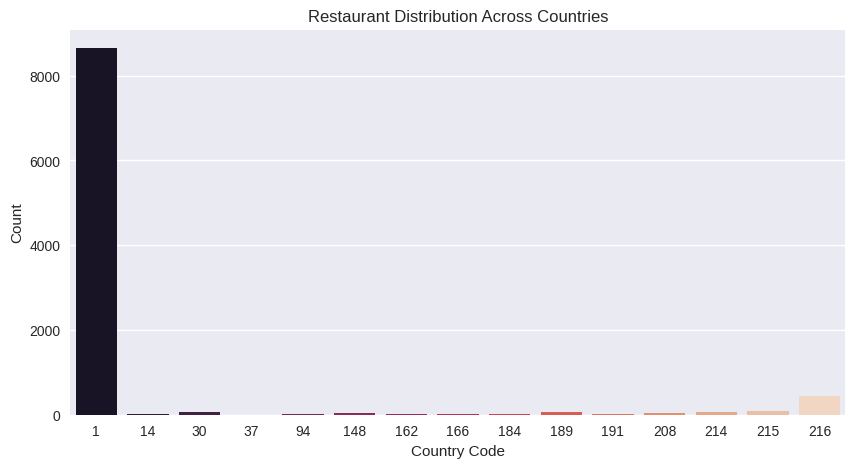

In [ ]:
print("\n🏙️ RESTAURANT COUNT BY CITY:")
print(df['City'].value_counts().head(10))
plt.figure(figsize=(14, 5))
sns.barplot(
    x=df['City'].value_counts().head(10).values,
    y=df['City'].value_counts().head(10).index,
    palette='crest'
)
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()
print("\n🌐 RESTAURANT COUNT BY COUNTRY:")
print(df['Country Code'].value_counts().head(10))
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Country Code', palette='rocket')
plt.title('Restaurant Distribution Across Countries')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.show()


Level 2 Task 1

Percentage of Restaurants:
Table Booking: 12.12%
Online Delivery: 25.66%


Text(0, 0.5, 'Percentage (%)')

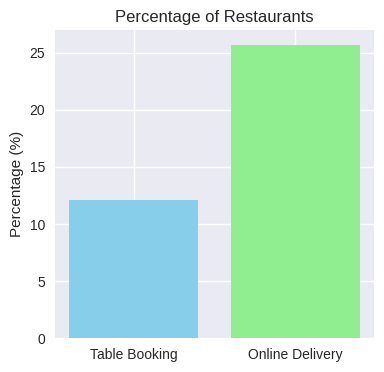

In [ ]:
total = len(df)
table_booking_pct = (df['Has Table booking'].str.strip().eq('Yes').sum() / total) * 100
online_delivery_pct = (df['Has Online delivery'].str.strip().eq('Yes').sum() / total) * 100
print("Percentage of Restaurants:")
print(f"Table Booking: {table_booking_pct:.2f}%")
print(f"Online Delivery: {online_delivery_pct:.2f}%")
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.bar(['Table Booking', 'Online Delivery'], [table_booking_pct, online_delivery_pct], color=['skyblue', 'lightgreen'])
plt.title('Percentage of Restaurants')
plt.ylabel('Percentage (%)')

Average Ratings by Table Booking:
Has Table booking
No     2.56
Yes    3.44
Name: Aggregate rating, dtype: float64


Text(0, 0.5, 'Average Rating')

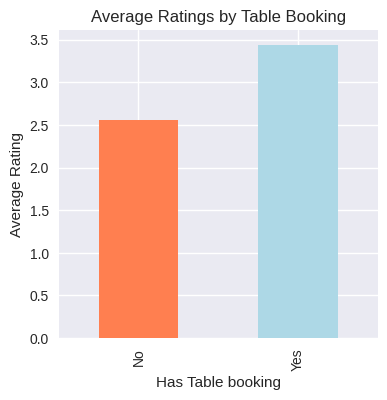

In [ ]:
avg_ratings = df.groupby('Has Table booking')['Aggregate rating'].mean().round(2)
print("Average Ratings by Table Booking:")
print(avg_ratings)
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 2)
avg_ratings.plot(kind='bar', color=['coral', 'lightblue'])
plt.title('Average Ratings by Table Booking')
plt.ylabel('Average Rating')

Online Delivery Percentage by Price Range:
Price range
1    15.77
2    41.31
3    29.19
4     9.04
Name: Has Online delivery, dtype: float64


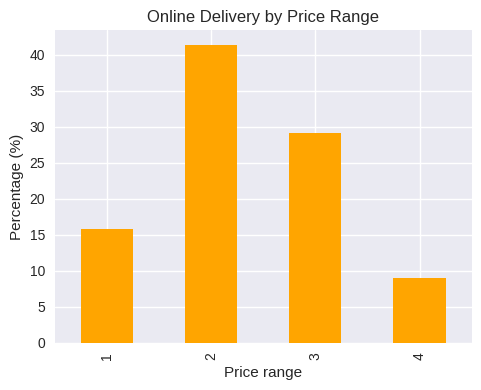

In [ ]:
delivery_by_price = (
    df.groupby('Price range')['Has Online delivery']
      .apply(lambda x: (x.str.strip().eq('Yes').sum() / len(x)) * 100)
      .round(2)
)
print("Online Delivery Percentage by Price Range:")
print(delivery_by_price)
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 3)
delivery_by_price.plot(kind='bar', color='orange')
plt.title('Online Delivery by Price Range')
plt.ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

Level 2
 Task 2

In [ ]:
most_common_price = df['Price range'].mode()[0]
print("Most common Price Range among all restaurants:", most_common_price)

Most common Price Range among all restaurants: 1


In [ ]:
avg_rating_by_price = df.groupby('Price range') ['Aggregate rating'].mean().round(2)
print("\nAverage Rating for each Price Range:")
print(avg_rating_by_price)


Average Rating for each Price Range:
Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


In [ ]:
highest_avg_rating = avg_rating_by_price.max()
best_price_range = avg_rating_by_price[avg_rating_by_price == highest_avg_rating].index[0]
best_color = df[df['Price range'] == best_price_range]['Rating color'].mode()[0]
print("\nHighest average rating is:", highest_avg_rating)
print("Price Range with highest rating:", best_price_range)
print("Color representing this rating:", best_color)


Highest average rating is: 3.82
Price Range with highest rating: 4
Color representing this rating: Yellow


Level 2
Task 3

In [ ]:
df['Name_Length'] = df['Restaurant Name'].str.len()
df['Address_Length'] = df['Address'].str.len()

print("Added new columns: Name_Length and Address_Length")
print(df[['Restaurant Name', 'Name_Length', 'Address', 'Address_Length']].head())

Added new columns: Name_Length and Address_Length
          Restaurant Name  Name_Length  \
0        Le Petit Souffle           16   
1        Izakaya Kikufuji           16   
2  Heat - Edsa Shangri-La           22   
3                    Ooma            4   
4             Sambo Kojin           11   

                                             Address  Address_Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  


In [ ]:
df['Table_Booking_Encoded'] = df['Has Table booking'].apply(lambda x: 1 if x.strip() == 'Yes' else 0)
df['Online_Delivery_Encoded'] = df['Has Online delivery'].apply(lambda x: 1 if x.strip() == 'Yes' else 0)

print("\nEncoded categorical columns to numeric:")
print(df[['Has Table booking', 'Table_Booking_Encoded',
          'Has Online delivery', 'Online_Delivery_Encoded']].head())



Encoded categorical columns to numeric:
  Has Table booking  Table_Booking_Encoded Has Online delivery  \
0               Yes                      1                  No   
1               Yes                      1                  No   
2               Yes                      1                  No   
3                No                      0                  No   
4               Yes                      1                  No   

   Online_Delivery_Encoded  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  


In [ ]:
print("Final columns added:")
print(['Name_Length', 'Address_Length', 'Table_Booking_Encoded', 'Online_Delivery_Encoded'])

Final columns added:
['Name_Length', 'Address_Length', 'Table_Booking_Encoded', 'Online_Delivery_Encoded']


Level 3 Task 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
df['Name_Length'] = df['Restaurant Name'].str.len()
df['Address_Length'] = df['Address'].str.len()
df['Table_Booking_Encoded'] = df['Has Table booking'].apply(lambda x: 1 if x.strip() == 'Yes' else 0)
df['Online_Delivery_Encoded'] = df['Has Online delivery'].apply(lambda x: 1 if x.strip() == 'Yes' else 0)


In [ ]:
X = df[['Price range', 'Votes', 'Table_Booking_Encoded', 'Online_Delivery_Encoded',
        'Name_Length', 'Address_Length']]
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split completed:")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Data split completed:
Training samples: 7640
Testing samples: 1911


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3),
        "R² Score": round(r2, 3)
    })

In [ ]:
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
display(results_df)

Model Performance Comparison:


,Model,MAE,RMSE,R² Score
0,Linear Regression,1.076,1.295,0.263
1,Decision Tree,0.313,0.480,0.899
2,Random Forest,0.232,0.353,0.945


Level 3 Task 2

In [ ]:
df['Primary_Cuisine'] = df['Cuisines'].astype(str).apply(lambda x: x.split(',')[0].strip())

# Step 2️⃣: Analyze average rating by cuisine
avg_rating_by_cuisine = (
    df.groupby('Primary_Cuisine')['Aggregate rating']
      .mean()
      .sort_values(ascending=False)
      .round(2)
)
print("Average Rating by Cuisine:")
print(avg_rating_by_cuisine.head(10))

Average Rating by Cuisine:
Primary_Cuisine
Sunda            4.90
Cajun            4.70
Scottish         4.70
Taiwanese        4.65
Filipino         4.62
Persian          4.60
Ramen            4.60
Argentine        4.50
World Cuisine    4.50
Hawaiian         4.48
Name: Aggregate rating, dtype: float64


Most Popular Cuisines by Total Votes:
Primary_Cuisine
North Indian    356684
Cafe            116576
American        105447
Italian          95153
Continental      94569
Chinese          84918
European         45842
Fast Food        42617
Bakery           42008
Pizza            36415
Name: Votes, dtype: int64


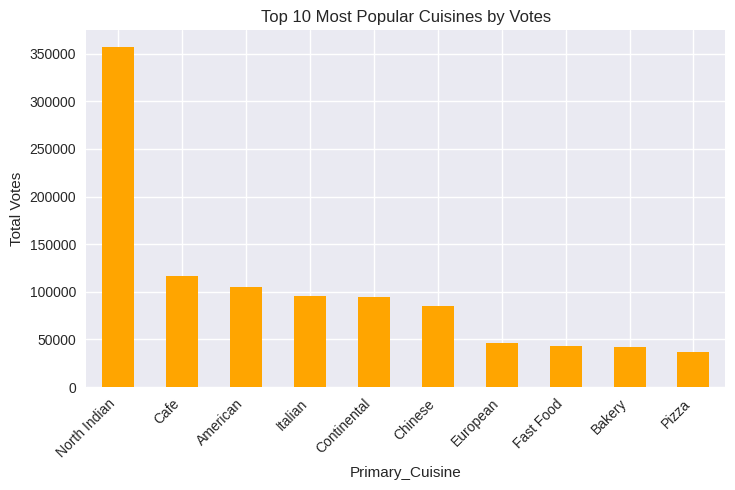

In [ ]:
popular_cuisines = (
    df.groupby('Primary_Cuisine')['Votes']
      .sum()
      .sort_values(ascending=False)
)
print("Most Popular Cuisines by Total Votes:")
print(popular_cuisines.head(10))
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
popular_cuisines.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Popular Cuisines by Votes')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Top 10 Cuisines with Highest Average Ratings:
Primary_Cuisine
Sunda            4.90
Cajun            4.70
Scottish         4.70
Taiwanese        4.65
Filipino         4.62
Persian          4.60
Ramen            4.60
Argentine        4.50
World Cuisine    4.50
Hawaiian         4.48
Name: Aggregate rating, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sunda'),
  Text(1, 0, 'Cajun'),
  Text(2, 0, 'Scottish'),
  Text(3, 0, 'Taiwanese'),
  Text(4, 0, 'Filipino'),
  Text(5, 0, 'Persian'),
  Text(6, 0, 'Ramen'),
  Text(7, 0, 'Argentine'),
  Text(8, 0, 'World Cuisine'),
  Text(9, 0, 'Hawaiian')])

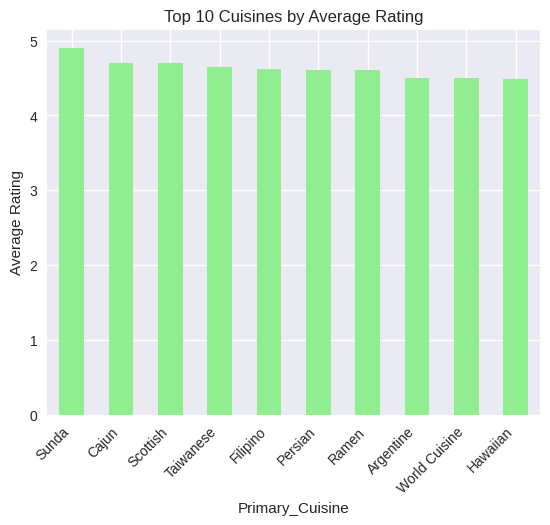

In [ ]:
top_cuisines = avg_rating_by_cuisine.head(10)
print("Top 10 Cuisines with Highest Average Ratings:")
print(top_cuisines)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
top_cuisines.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cuisines by Average Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

Level 3 Task 3

Text(0, 0.5, 'Number of Restaurants')

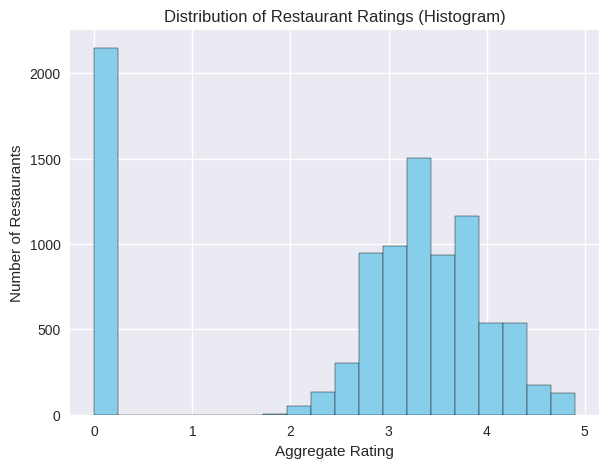

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Ratings (Histogram)')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')

/tmp/ipython-input-1667976698.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_cuisine.index, y=avg_rating_cuisine.values, palette="coolwarm")


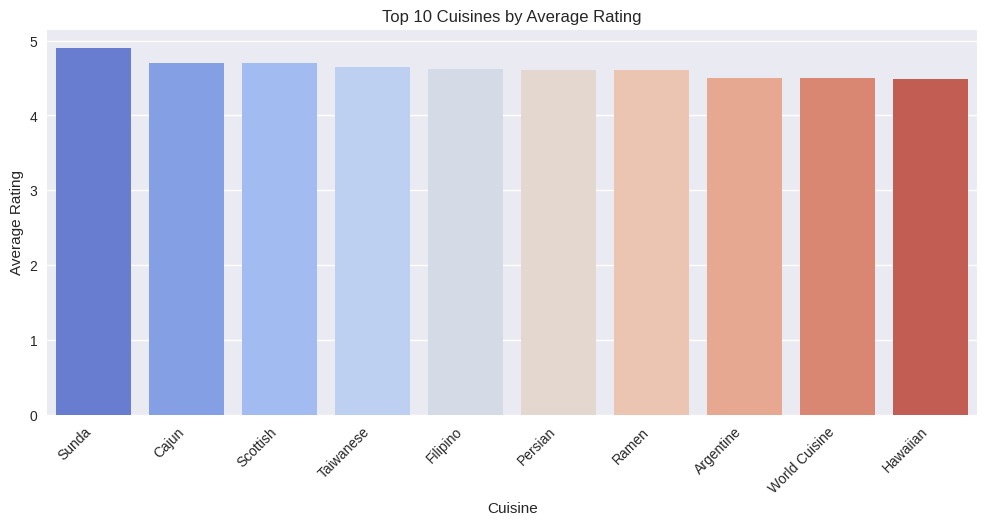

In [ ]:
df['Primary_Cuisine'] = df['Cuisines'].astype(str).apply(lambda x: x.split(',')[0].strip())

avg_rating_cuisine = (
    df.groupby('Primary_Cuisine')['Aggregate rating']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(12, 5))
sns.barplot(x=avg_rating_cuisine.index, y=avg_rating_cuisine.values, palette="coolwarm")
plt.title('Top 10 Cuisines by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Cuisine')
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipython-input-831508410.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_city.index, y=avg_rating_city.values, palette="viridis")


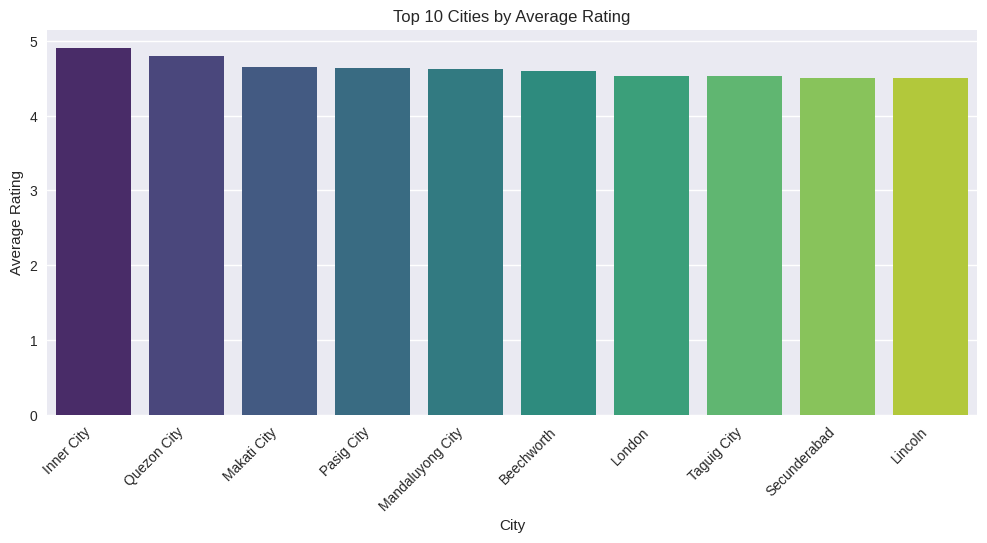

In [ ]:
avg_rating_city = (
    df.groupby('City')['Aggregate rating']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(12, 5))
sns.barplot(x=avg_rating_city.index, y=avg_rating_city.values, palette="viridis")
plt.title('Top 10 Cities by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('City')
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0, 0.5, 'Aggregate Rating')

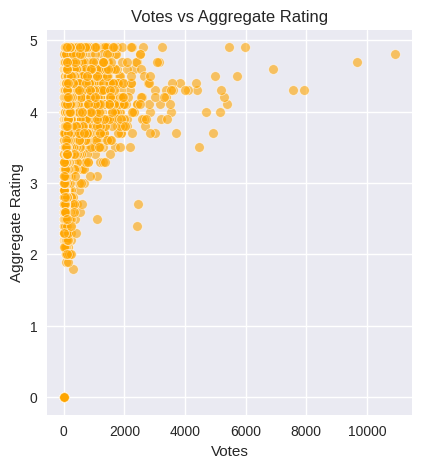

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, color='orange', alpha=0.6)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')

/tmp/ipython-input-1007945525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette="pastel")


Text(0, 0.5, 'Aggregate Rating')

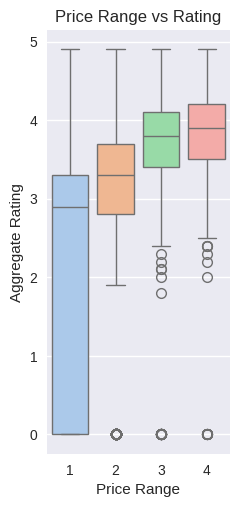

In [ ]:
plt.subplot(1, 3, 2)
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette="pastel")
plt.title('Price Range vs Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')

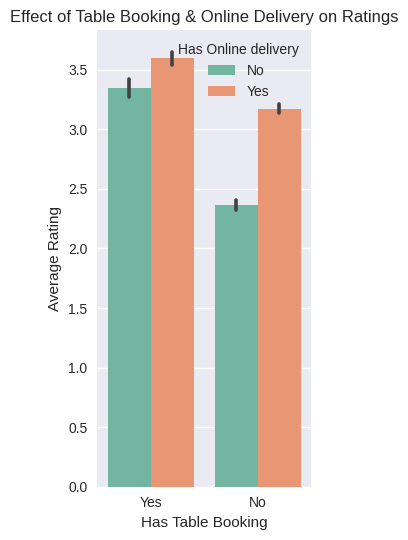

In [ ]:
plt.subplot(1, 3, 3)
sns.barplot(
    data=df,
    x='Has Table booking',
    y='Aggregate rating',
    hue='Has Online delivery',
    palette='Set2'
)
plt.title('Effect of Table Booking & Online Delivery on Ratings')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

In [ ]:
import zipfile
import os

# Define the name of your zip file
zip_filename = "Cognifyz.zip"

# Create a ZipFile object in write mode
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Add your Colab notebook
    # zipf.write("Cognifyz.ipynb") # Replace with your notebook's name

    # Add any other files or folders you want to include
    # Example: adding a generated CSV file
    if os.path.exists("Dataset .csv"):
        zipf.write("Dataset .csv")

    # Example: adding a folder and its contents
    # if os.path.exists("my_output_folder"):
    #     for root, _, files in os.walk("my_output_folder"):
    #         for file in files:
    #             zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), "my_output_folder"))

print(f"'{zip_filename}' created successfully.")

'Cognifyz.zip' created successfully.
